In [6]:
#grab the html
import requests
page = requests.get('https://www.boxofficemojo.com/year/2018/?grossesOption=totalGrosses&sortDir=asc&sort=releaseDate&ref_=bo_yld__resort')
page

<Response [200]>

In [7]:
page.status_code #check response code

200

In [8]:
#print HTML content
page.content

b'<!doctype html><html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/><script type="text/javascript">\n    var _gaq = _gaq || [];\n    _gaq.push([\'_setAccount\', \'UA-2831726-1\']);\n    _gaq.push([\'_setCustomVar\', 2, \'hostname\', window.location.hostname]);\n    _gaq.push([\'_trackPageview\']);\n\n    (function() {\n        var ga = document.createElement(\'script\'); ga.type = \'text/javascript\'; ga.async = true;\n        ga.src = (\'https:\' == document.location.protocol ? \'https://ssl\' : \'http://www\') + \'.google-analytics.com/ga.js\';\n        (document.getElementsByTagName(\'head\')[0] || document.getElementsByTagName(\'body\')[0]).appendChild(ga);\n    })();\n</script><meta name="viewport" content="width=device-width, initial-scale=1.0" />\n                <meta charset="utf-8" />\n            <title dir="ltr">Domestic Box Office For 2018 - Box Office Mojo</title><meta content="Domestic Box Of

In [9]:
#parse with Beautiful Soup
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
soup

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/><script type="text/javascript">
    var _gaq = _gaq || [];
    _gaq.push(['_setAccount', 'UA-2831726-1']);
    _gaq.push(['_setCustomVar', 2, 'hostname', window.location.hostname]);
    _gaq.push(['_trackPageview']);

    (function() {
        var ga = document.createElement('script'); ga.type = 'text/javascript'; ga.async = true;
        ga.src = ('https:' == document.location.protocol ? 'https://ssl' : 'http://www') + '.google-analytics.com/ga.js';
        (document.getElementsByTagName('head')[0] || document.getElementsByTagName('body')[0]).appendChild(ga);
    })();
</script><meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta charset="utf-8"/>
<title dir="ltr">Domestic Box Office For 2018 - Box Office Mojo</title><meta content="Domestic Box Office For 2018" name="title"/>
<meta content="Box Office Mojo" 

In [10]:
print(soup.prettify())

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo">
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   var _gaq = _gaq || [];
    _gaq.push(['_setAccount', 'UA-2831726-1']);
    _gaq.push(['_setCustomVar', 2, 'hostname', window.location.hostname]);
    _gaq.push(['_trackPageview']);

    (function() {
        var ga = document.createElement('script'); ga.type = 'text/javascript'; ga.async = true;
        ga.src = ('https:' == document.location.protocol ? 'https://ssl' : 'http://www') + '.google-analytics.com/ga.js';
        (document.getElementsByTagName('head')[0] || document.getElementsByTagName('body')[0]).appendChild(ga);
    })();
  </script>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta charset="utf-8"/>
  <title dir="ltr">
   Domestic Box Office For 2018 - Box Office Mojo
  </title>
  <meta content="Domestic Box Office For 2018" name="title

In [11]:
list(soup.children)

['doctype html',
 <html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/><script type="text/javascript">
     var _gaq = _gaq || [];
     _gaq.push(['_setAccount', 'UA-2831726-1']);
     _gaq.push(['_setCustomVar', 2, 'hostname', window.location.hostname]);
     _gaq.push(['_trackPageview']);
 
     (function() {
         var ga = document.createElement('script'); ga.type = 'text/javascript'; ga.async = true;
         ga.src = ('https:' == document.location.protocol ? 'https://ssl' : 'http://www') + '.google-analytics.com/ga.js';
         (document.getElementsByTagName('head')[0] || document.getElementsByTagName('body')[0]).appendChild(ga);
     })();
 </script><meta content="width=device-width, initial-scale=1.0" name="viewport"/>
 <meta charset="utf-8"/>
 <title dir="ltr">Domestic Box Office For 2018 - Box Office Mojo</title><meta content="Domestic Box Office For 2018" name="title"/>
 <meta content="Box Offic

In [12]:
names = soup.find_all('td', class_="a-text-left mojo-field-type-release mojo-cell-wide")

In [13]:
names[0].string

'Insidious: The Last Key'

In [14]:
type(names)

bs4.element.ResultSet

In [15]:
all_names = []
for name in names:
    try:
        all_names.append(names.string)
    except:
        all_names.append('NAN')
    continue

In [16]:
gross_opening = soup.find_all('td', class_="a-text-right mojo-field-type-money") #this class pulls both gross and opening weekend revenue

In [17]:
gross_opening[2].string

'$104,451'

In [18]:
#evens = gross, odds = opening weekend revenues
i=0
gross = []
opening = []

for thing in gross_opening:
    if i%2==0:
        gross.append(gross_opening[i].string)
    elif i%2!=0:
        opening.append(gross_opening[i].string)
    i+=1

In [19]:
gross

['$67,745,330',
 '$104,451',
 '$7,014',
 '$15,586',
 '$19,554',
 '$149,072',
 '$66,176',
 '$549,602',
 '$237,411',
 '$11,762',
 '$36,343,858',
 '$40,891,591',
 '$75,929',
 '$29,647',
 '$18,877',
 '$36,215',
 '$20,877,013',
 '$19,696',
 '$646,497',
 '$69,431',
 '$61,133',
 '$447,719',
 '$320,079',
 '$215,295',
 '$34,562',
 '$64,994',
 '$2,418,404',
 '$10,430',
 '$41,934',
 '$35,757',
 '$25,183',
 '$4,547',
 '$187,360',
 '$45,819,713',
 '$44,947,622',
 '$7,216',
 '$16,376,066',
 '$313,088',
 '$10,638,033',
 '$16,500',
 '$4,537',
 '$75,134',
 '$12,965',
 '$57,902,320',
 '$1,926',
 '$9,425',
 '$77,854',
 '$2,023,749',
 '$124,573',
 '$9,005',
 '$24,955',
 '$59,114',
 '$390,207',
 '$490,973',
 '$4,592',
 '$118,352',
 '$28,550',
 '$26,699',
 '$3,392',
 '$25,091,816',
 '$167,991',
 '$37,183',
 '$217,681',
 '$1,895,840',
 '$58,751',
 '$4,400',
 '$100,407,760',
 '$41,888',
 '$115,253,424',
 '$1,670,192',
 '$21,786',
 '$36,276,286',
 '$2,783,739',
 '$667',
 '$1,115,018',
 '$220,682',
 '$74,720',


In [20]:
opening_date = soup.find_all('td', class_='a-text-left mojo-field-type-date mojo-sort-column a-nowrap')

In [21]:
all_opening_dates = []
for thing in opening_date:
    try:
        all_opening_dates.append(thing.string)
    except:
        all_opening_dates.append('NAN')
        continue

In [54]:
all_opening_dates

['Jan 5',
 'Jan 5',
 'Jan 5',
 'Jan 5',
 'Jan 5',
 'Jan 5',
 'Jan 5',
 'Jan 10',
 'Jan 11',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 12',
 'Jan 13',
 'Jan 14',
 'Jan 16',
 'Jan 17',
 'Jan 18',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 19',
 'Jan 21',
 'Jan 25',
 'Jan 26',
 'Jan 26',
 'Jan 26',
 'Jan 26',
 'Jan 26',
 'Jan 26',
 'Jan 26',
 'Jan 26',
 'Jan 27',
 'Jan 29',
 'Jan 30',
 'Jan 31',
 'Feb 1',
 'Feb 2',
 'Feb 2',
 'Feb 2',
 'Feb 2',
 'Feb 2',
 'Feb 2',
 'Feb 2',
 'Feb 2',
 'Feb 4',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 9',
 'Feb 10',
 'Feb 11',
 'Feb 14',
 'Feb 14',
 'Feb 14',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 16',
 'Feb 1

In [22]:
closing_date = soup.find_all('td', class_='a-text-left mojo-field-type-date a-nowrap')

In [23]:
all_closing_dates = []
for thing in closing_date:
    try:
        all_closing_dates.append(thing.string)
    except:
        all_closing_dates.append('NAN')
        continue

In [24]:
all_closing_dates

['Mar 29',
 'May 10',
 'Jan 18',
 'Mar 29',
 'Feb 22',
 'Feb 1',
 'Jan 18',
 'Jan 19',
 'Jan 11',
 'Feb 8',
 'Mar 15',
 'Mar 15',
 'Jan 25',
 'Feb 15',
 'Apr 19',
 'Mar 8',
 'Mar 8',
 'Feb 8',
 'Apr 19',
 'Feb 8',
 'Jul 26',
 'Feb 1',
 'Jan 17',
 'Jan 16',
 '-',
 'May 31',
 'Apr 5',
 'Feb 15',
 'Feb 15',
 'Feb 15',
 'Mar 1',
 'Jan 25',
 'Mar 1',
 'Mar 29',
 'Mar 22',
 'Jan 21',
 'May 10',
 'Jul 16',
 'Feb 25',
 'Mar 11',
 'Feb 1',
 'Mar 8',
 'Feb 15',
 'May 3',
 'Feb 1',
 'Feb 22',
 'Apr 19',
 '-',
 'Feb 7',
 'Jan 30',
 'Jun 14',
 'Feb 1',
 'May 20',
 'Mar 1',
 'Apr 5',
 'Feb 22',
 'Mar 22',
 'Mar 15',
 'Feb 8',
 'Mar 29',
 'Feb 4',
 'Feb 25',
 'May 17',
 'Mar 22',
 'Apr 8',
 'Feb 11',
 'Apr 5',
 'Mar 4',
 'Jun 14',
 'Mar 8',
 'Feb 22',
 'Apr 12',
 'Mar 15',
 '-',
 'Feb 14',
 'Feb 12',
 'May 17',
 'Apr 19',
 'Feb 25',
 'Mar 8',
 'Mar 15',
 'Apr 5',
 'May 10',
 'Apr 5',
 'Mar 8',
 'Mar 29',
 'Mar 15',
 'Jun 28',
 'Mar 1',
 'Aug 9',
 'Mar 8',
 'May 10',
 'Apr 12',
 '-',
 'Feb 21',
 'Feb 

In [ ]:
#sample code for date subtraction
# from datetime import datetime

# start_date = 'Sun Sep 16 16:05:15 +0000 2012'
# end_date = 'Sun Sep 17 23:55:20 +0000 2012'


# def __datetime(date_str):
#     return datetime.strptime(date_str, '%a %b %d %H:%M:%S +0000 %Y')

# start = __datetime(start_date)
# end = __datetime(end_date)

# delta = end - start
# print delta  # prints: 1 day, 7:50:05
# print delta.total_seconds()



from datetime import datetime

test_open = 'Jan 5'
test_close = 

In [68]:
#convert months to numbers
#add year
release_date_clean = []
for item in all_opening_dates:
    y = item.replace('Jan ', '2018-01-')
    y2 = y.replace('Feb ', '2018-02-')
    y3 = y2.replace('Mar ', '2018-03-')
    y4 = y3.replace('Apr ', '2018-04-')
    y5= y4.replace('May ', '2018-05-')
    y6 = y5.replace('Jun ', '2018-06-')
    y7 = y6.replace('Jul ', '2018-07-')
    y8 = y7.replace('Aug ', '2018-08-')
    y9 = y8.replace('Sep ', '2018-09-')
    y10 = y9.replace('Oct ', '2018-10-')
    y11 = y10.replace('Nov ', '2018-11-')
    y12 =y11.replace('Dec ', '2018-12-')
    release_date_clean.append(y12)
    
    

In [69]:
release_date_clean

['2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-10',
 '2018-01-11',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-13',
 '2018-01-14',
 '2018-01-16',
 '2018-01-17',
 '2018-01-18',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-21',
 '2018-01-25',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-27',
 '2018-01-29',
 '2018-01-30',
 '2018-01-31',
 '2018-02-1',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-4',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '20

In [70]:
closing_date_clean = []
for item in all_opening_dates:
    y = item.replace('Jan ', '2018-01-')
    y2 = y.replace('Feb ', '2018-02-')
    y3 = y2.replace('Mar ', '2018-03-')
    y4 = y3.replace('Apr ', '2018-04-')
    y5= y4.replace('May ', '2018-05-')
    y6 = y5.replace('Jun ', '2018-06-')
    y7 = y6.replace('Jul ', '2018-07-')
    y8 = y7.replace('Aug ', '2018-08-')
    y9 = y8.replace('Sep ', '2018-09-')
    y10 = y9.replace('Oct ', '2018-10-')
    y11 = y10.replace('Nov ', '2018-11-')
    y12 =y11.replace('Dec ', '2018-12-')
    closing_date_clean.append(y12)

In [71]:
closing_date_clean

['2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-5',
 '2018-01-10',
 '2018-01-11',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-12',
 '2018-01-13',
 '2018-01-14',
 '2018-01-16',
 '2018-01-17',
 '2018-01-18',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-19',
 '2018-01-21',
 '2018-01-25',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-26',
 '2018-01-27',
 '2018-01-29',
 '2018-01-30',
 '2018-01-31',
 '2018-02-1',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-2',
 '2018-02-4',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '2018-02-9',
 '20

In [73]:
closing_date_clean_pd = pd.DataFrame(closing_date_clean)

In [74]:
closing_date_clean_pd.to_csv('closing_date_clean.csv')

In [77]:
release_date_clean_pd = pd.DataFrame(release_date_clean)

In [78]:
release_date_clean_pd.to_csv('release_date_clean.csv')

In [ ]:
int(str(subtracted_w_z[0]).split()[0])

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

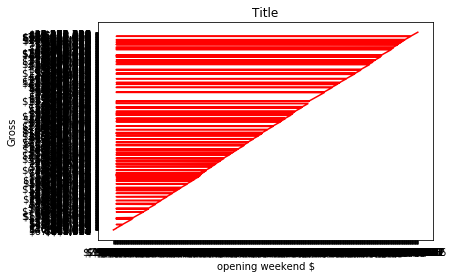

In [26]:
plt.plot (opening, gross, 'r') #r is color red
plt.xlabel('opening weekend $')
plt.ylabel('Gross')
plt.title('Title')
plt.show()

In [27]:
import numpy as np

In [28]:
gross1 = gross[0].strip('$')

In [29]:
gross2 = gross1.replace(',', '')

In [30]:
gross2

'67745330'

In [31]:
#convert gross revenue to int
gross_numbers=[]

for item in gross:
    try:
        gross = item.strip('$')
        gross1 = gross.strip(',')
        gross2 = gross1.replace(',', '')
        gross3 = int(gross2)
        gross_numbers.append(gross3)
    except:
        opening_numbers.append(item)

In [32]:
opening_numbers=[]
for item in opening:
    try:
        maybe = item.strip('$')
        maybe2=maybe.strip(',')
        maybe3 = maybe2.replace(',','')
        maybe4= int(maybe3)
        opening_numbers.append(maybe4)
    except:
        opening_numbers.append(item)

In [33]:
#zip lists to create a tuple so values stayed matched, use filter lambda to filter out '-'
zipped_opening_gross = zip(opening_numbers, gross_numbers)

In [34]:
zipped_opening_gross_tuple = list(zip(opening_numbers, gross_numbers))

In [35]:
zipped_opening_gross_clean = list(filter(lambda x: '-' not in x, zipped_opening_gross_tuple))

In [36]:
#unzipped x,y tuple, takes out hypen and corresponding hyphen value
opening_clean = [x[0] for x in zipped_opening_gross_clean]
gross_clean = [x[1] for x in zipped_opening_gross_clean]

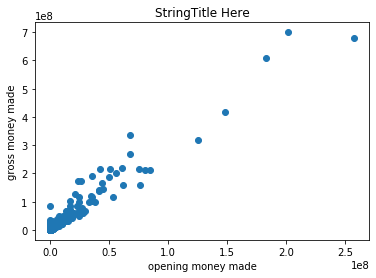

In [37]:
plt.scatter(opening_clean, gross_clean)
plt.xlabel('opening money made')
plt.ylabel('gross money made')
plt. title('StringTitle Here')
plt.show()

In [38]:
import pandas as pd

In [39]:
len(opening_numbers)

878

In [40]:
opening_numbers_pd = pd.DataFrame(opening_numbers)

In [42]:
opening_numbers_pd.to_csv('opening_numbers.csv')

In [44]:
gross_numbers_pd = pd.DataFrame(gross_numbers)

In [45]:
gross_numbers_pd.to_csv('gross_numbers.csv')

In [46]:
all_closing_dates_pd = pd.DataFrame(all_closing_dates)

In [47]:
all_closing_dates_pd.to_csv('all_closing_dates.csv')

In [48]:
all_opening_dates_pd = pd.DataFrame(all_opening_dates)

In [49]:
all_opening_dates_pd.to_csv('all_opening_dates.csv')

In [50]:
all_names_pd = pd.DataFrame(all_names)

In [51]:
all_names_pd.to_csv('all_names.csv')

In [53]:
import requests
import json
import config.py

ModuleNotFoundError: No module named 'config.py'; 'config' is not a package

In [2]:
import mysql.connector

In [3]:
cnx = mysql.connector .connect(
    host = config.host,
    user = config.user,
    pw = config.pw
)
cursor = cnx.cursor()

NameError: name 'config' is not defined

# Begin Scrape 2

In [ ]:
page2 = requests.get('https://www.metacritic.com/browse/movies/score/metascore/year/filtered?year_selected=2018&sort=desc)
page2